---

## Imports

In [1]:
import pandas as pd
import numpy as np

import wget, os
import time
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## Reservoir Storage DataFrame Columns

In [5]:
res_strg_orig_cols=['DATE TIME',
                    'STATION_ID',
                    'VALUE']

res_strg_new_cols =['datetime',
                    'reservoir_id',
                    'water_acre_feet']

res_strg_rename_dict = {old: new for old, new in zip(res_strg_orig_cols,
                                                     res_strg_new_cols)}

## Loop Through Files & Append Data

In [8]:
res_strg_df = pd.DataFrame(columns=res_strg_new_cols)

for file in glob.glob('../raw_data/ca_dwr_dl/*.csv'):
    df = pd.read_csv(file, usecols=res_strg_orig_cols).rename(index=str,
                                                              columns=res_strg_rename_dict)
    
    
    res_strg_df = res_strg_df.append(df, ignore_index=True, sort=True)

In [9]:
res_strg_df = res_strg_df.sort_values(by='datetime').reset_index(drop=True)

res_strg_df['datetime'] = pd.to_datetime(res_strg_df['datetime'])

res_strg_df.set_index('datetime', inplace=True)
res_strg_df.sort_index(inplace=True)


res_strg_df.head()

,reservoir_id,water_acre_feet
datetime,,
2016-01-01,ENG,65363
2016-01-01,CLE,497447
2016-01-01,COY,39357
2016-01-01,UNV,148814
2016-01-01,PNF,150598


In [10]:
res_strg_df = res_strg_df.tz_localize('America/Los_Angeles',
                        ambiguous=False
                        )

In [11]:
res_strg_df.tail()

,reservoir_id,water_acre_feet
datetime,,
2019-05-07 00:00:00-07:00,PYM,167972
2019-05-07 00:00:00-07:00,CMN,---
2019-05-07 00:00:00-07:00,KES,21514
2019-05-07 00:00:00-07:00,LON,53404
2019-05-07 00:00:00-07:00,LEW,14352


In [12]:
res_strg_df.shape

(1051333, 2)

In [13]:
res_strg_df.isna().sum()

reservoir_id       0
water_acre_feet    0
dtype: int64

In [14]:
res_strg_df.replace('---', np.nan, inplace=True)
res_strg_df.replace('ART', np.nan, inplace=True)
res_strg_df.replace('BRT', np.nan, inplace=True)

In [15]:
res_strg_df.isna().sum()

reservoir_id          0
water_acre_feet    6663
dtype: int64

In [16]:
res_strg_df.water_acre_feet.fillna(method='ffill', inplace=True)

In [17]:
res_strg_df.isna().sum()

reservoir_id       0
water_acre_feet    0
dtype: int64

In [18]:
res_strg_df.dtypes

reservoir_id       object
water_acre_feet    object
dtype: object

In [19]:
res_strg_df.water_acre_feet = res_strg_df.water_acre_feet.astype(int)

In [20]:
res_strg_df.dtypes

reservoir_id       object
water_acre_feet     int64
dtype: object

In [21]:
ca_water_levels = pd.DataFrame(res_strg_df.groupby('datetime')['water_acre_feet'].sum())

In [22]:
ca_water_levels.head()

,water_acre_feet
datetime,
2016-01-01 00:00:00-08:00,7122110
2016-01-01 01:00:00-08:00,6520032
2016-01-01 02:00:00-08:00,6325227
2016-01-01 03:00:00-08:00,6520067
2016-01-01 04:00:00-08:00,6520164


In [23]:
ca_water_levels.shape

(29325, 1)

In [24]:
ca_water_levels.tail()

,water_acre_feet
datetime,
2019-05-06 20:00:00-07:00,22252942
2019-05-06 21:00:00-07:00,22254822
2019-05-06 22:00:00-07:00,22257304
2019-05-06 23:00:00-07:00,22259527
2019-05-07 00:00:00-07:00,22734666


## Export to .csv File

In [25]:
res_strg_df.to_csv('../data/water_levels_by_reservoir.csv')

In [26]:
ca_water_levels.to_csv('../data/ca_water_levels.csv')

---

## Plot CA Water Levels Over Time

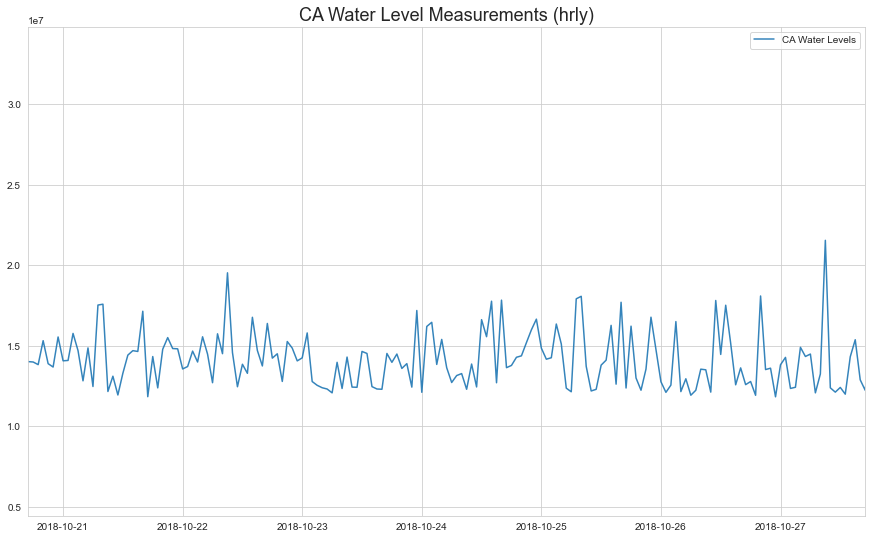

In [27]:
plt.figure(figsize=(15,9))
plt.title('CA Water Level Measurements (hrly)', fontsize=18)

plt.plot(ca_water_levels.index,
         ca_water_levels.water_acre_feet,
         label = 'CA Water Levels',
         alpha = 0.9)

plt.xlim('2018-10-21', '2018-10-28')

# plt.ylabel('Water Level (in Acre-feet)', fontsize=18)
plt.legend()
# plt.savefig('../images/ca_wtr_lev_1wk_oct18.jpg', bbox_inches='tight')
plt.show();